In [3]:
import pandas as pd
df = pd.read_csv("med.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


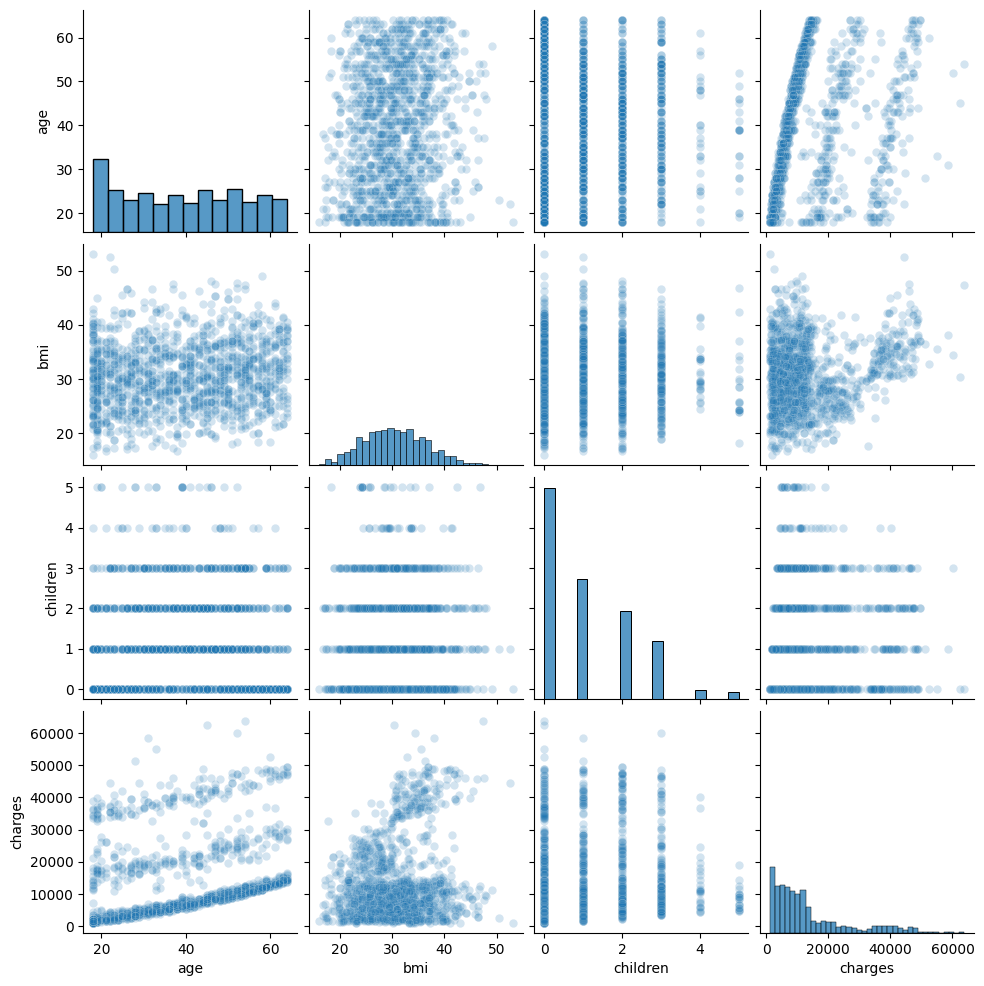

In [5]:
import seaborn as sns
sns.pairplot(data=df,kind = 'scatter',plot_kws={'alpha':0.1})

In [6]:
sns.heatmap(data = df[])

ValueError: could not convert string to float: 'female'

<Axes: >

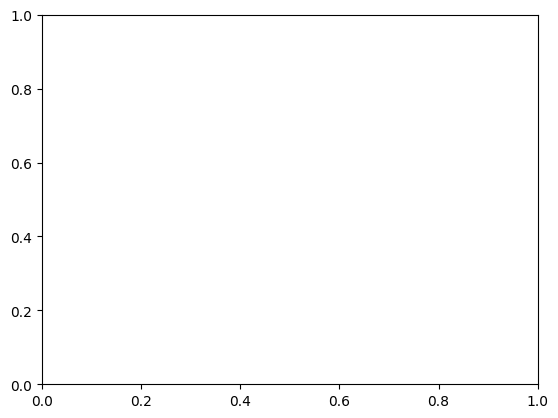

In [7]:
sns.lineplot()

In [21]:
df = df.drop('region',axis = 1)

In [23]:
df = pd.get_dummies(df,columns=['sex','smoker']).astype(int)


In [24]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27,0,16884,1,0,0,1
1,18,33,1,1725,0,1,1,0
2,28,33,3,4449,0,1,1,0
3,33,22,0,21984,0,1,1,0
4,32,28,0,3866,0,1,1,0


In [26]:
l = ['age','bmi','children']
for i in l:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    range = 1.5 * iqr
    df = df[(df[i] >= q1 - range) & (df[i] <= q3 + range)]

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
print(lr.score(X_train,y_train),lr.score(X_test,y_test))

0.7432648815739867 0.7632438081076205
